###### Intro

we are going the predict the presence of heart disease with the given data about the person

data source : https://archive.ics.uci.edu/ml/datasets/Heart+Disease


###### importing required packages

In [1]:
# numeric and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics and preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Data/cleveland-Heart-disease-data.txt', 
                    names=['age', 'sex', 'pain', 'restbps', 'chol', 'fbs', 'restecg', 'maxheartrate', 'exang',
                          'oldpeak', 'slope', 'ca', 'thal', 'num'],
                   index_col=False)

In [3]:
data.head()

,age,sex,pain,restbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


###### description for the features of the dataset.
the original dataset consists for 76 attributes. we make use of only 14 of them.

1. age : age in years
2. sex : sex(1 : male, 0 : female)
3. cp  : type of the chest pain ( 1 : typical agina , 2 : atypical agina , 3 : non-aginal , 4 : asymtomatic )
4. chol : serum cholestoral level in mg/dl
5. trestbp : resting blood pressure in mm Hg( millimeter of mercury)
6. fbs : fasting blood sugar ( 1 : if fbs > 120 mg/dl, 0 : if fbs < 120 mg/dl)
7. restecg : resting electrocardiographic results( 0 : normal , 1 : having ST wave abnormality , 2 : showing probable or definite left venticular hypertrophy by Estes's criteria)
8. thalach : maximum heart rate achieved.
9. exang : excercise induced angina( 1 : yes , 0 : no)
10. oldpeak : st depression induced by excercise relative to rest
11. slope : slope of peak exercise ST segment(1 : unslopping, 2 : flat, 3 : downslopping)
12. ca : number of major vessels(0-3) coloured by flourosopy.
13. thal : a blood disorder called thalassemia ( 3 : normal , 6 : fixed defect , 7 : reversable defect))
14. num : heart disease( 0 : no, 1 : yes )

###### performing null check and understanding basic information and statistics of the dataset

In [4]:
data.isnull().any()

age             False
sex             False
pain            False
restbps         False
chol            False
fbs             False
restecg         False
maxheartrate    False
exang           False
oldpeak         False
slope           False
ca              False
thal            False
num             False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age             303 non-null float64
sex             303 non-null float64
pain            303 non-null float64
restbps         303 non-null float64
chol            303 non-null float64
fbs             303 non-null float64
restecg         303 non-null float64
maxheartrate    303 non-null float64
exang           303 non-null float64
oldpeak         303 non-null float64
slope           303 non-null float64
ca              303 non-null object
thal            303 non-null object
num             303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [6]:
data.describe()

,age,sex,pain,restbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


 let us just check only the presence of heart disease and not the status of the disease. so we can convert
 the 'num' column as new column of '0' for absence of disease and '1' for persence of disease

In [143]:
data['hd'] = np.where(data['num'] > 0, 1, 0)
data.drop('num', axis=1, inplace=True)

###### visualizing the data

plot the correlation plot to understand the correlation between the attributes

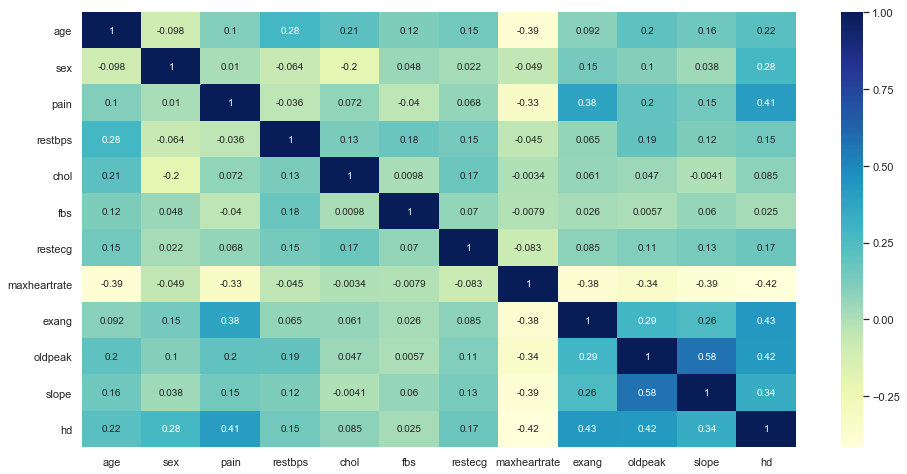

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

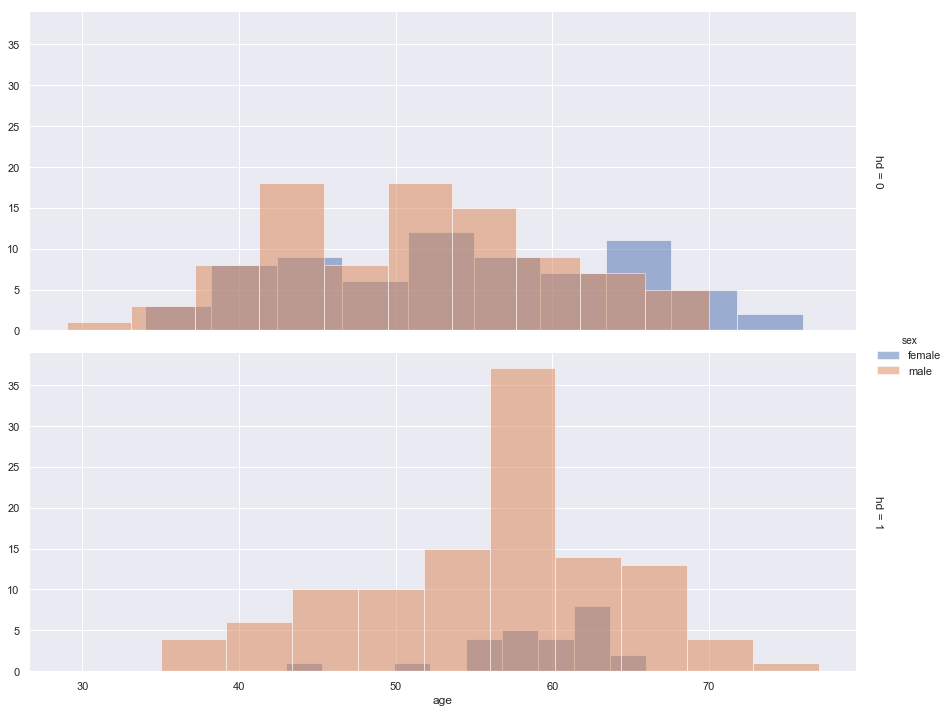

In [25]:
grid = sns.FacetGrid(data, row='hd', hue='sex', margin_titles=True, height=5, aspect=2.5)
grid_obj = grid.map(plt.hist, 'age', alpha=0.5).add_legend()
lab = ['female', 'male']
for t, l in zip(grid_obj._legend.texts, lab):
    t.set_text(l)

it seems like data we have has a majority sample of male with heart disease and most of them 
are in the age to 55-65

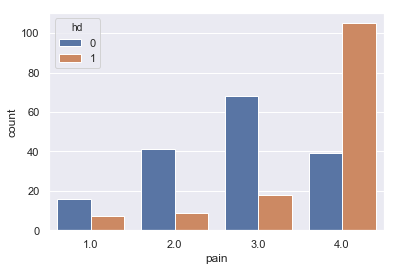

In [26]:
sns.countplot(x='pain', hue='hd', data=data)

seems like people with the asymptomatic(type 4) have the highest posibility of having heart disease.

Text(0.5,1,'male')

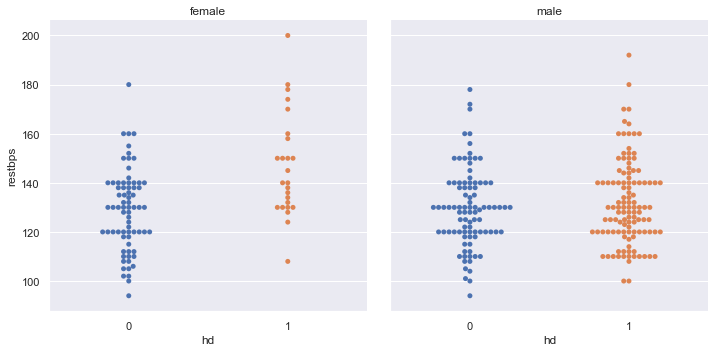

In [27]:
grid = sns.catplot(x='hd', y='restbps', data=data, col='sex', kind='swarm').add_legend()
axes = grid.axes.flatten()
axes[0].set_title('female')
axes[1].set_title('male')

the resting blood pressure do not have any strong indication of a heart disease.the level are somewhat equal
in both people with heart disease and without heart disease.

Text(0.5,1,'male')

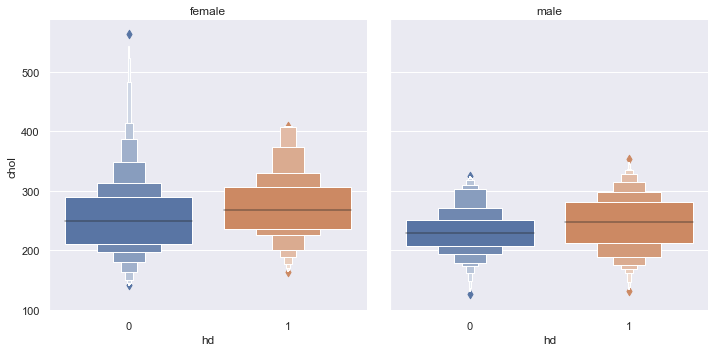

In [17]:
grid = sns.catplot(x='hd', y='chol', data=data, col='sex', kind='boxen').add_legend()
axes = grid.axes.flatten()
axes[0].set_title('female')
axes[1].set_title('male')

most people with heart disease tend to have a cholestrol level around 300

[Text(0,0,'fbs < 120'), Text(0,0,'fbs > 120')]

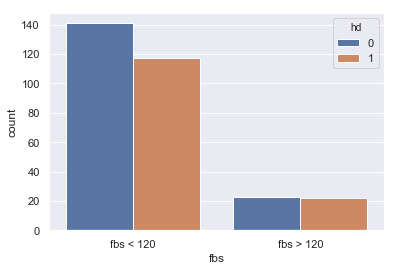

In [28]:
grid = sns.countplot(x='fbs', hue='hd', data=data)
grid.set_xticklabels(['fbs < 120', 'fbs > 120'])

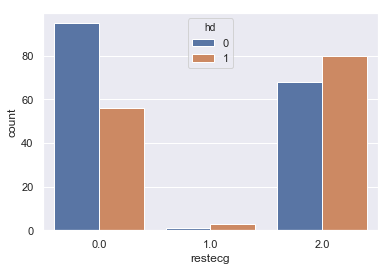

In [29]:
grid = sns.countplot(x='restecg', hue='hd', data=data)

Text(0.5,1,'male')

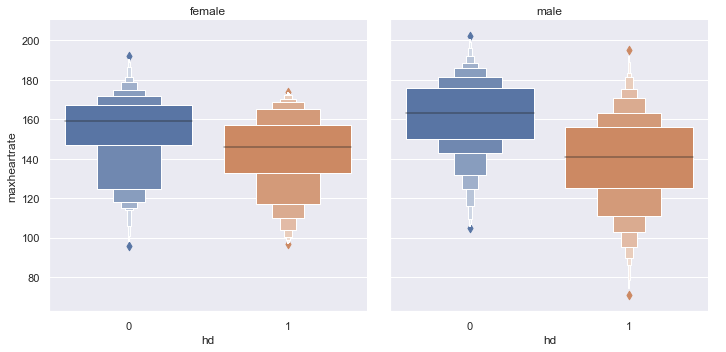

In [30]:
grid = sns.catplot(x='hd', y='maxheartrate', data=data, col='sex', kind='boxen').add_legend()
axes = grid.axes.flatten()
axes[0].set_title('female')
axes[1].set_title('male')

seems like people with heart disease do have lesser heartrates.

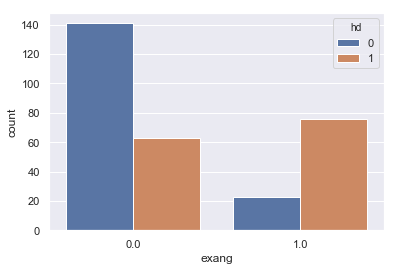

In [31]:
grid = sns.countplot(x='exang', hue='hd', data=data)

Text(0.5,1,'male')

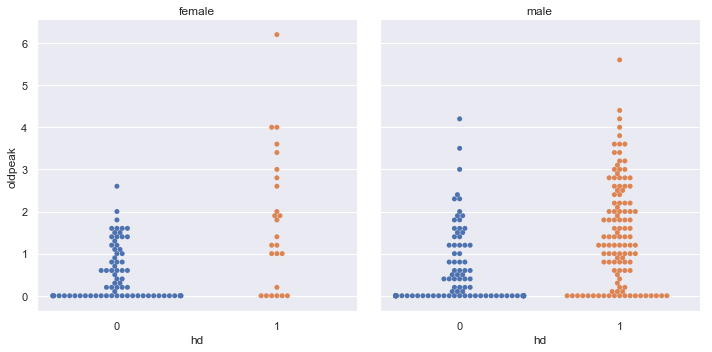

In [32]:
grid = sns.catplot(x='hd', y='oldpeak', data=data, col='sex', kind='swarm')
axes = grid.axes.flatten()
axes[0].set_title('female')
axes[1].set_title('male')

a higher oldpeak(depression induced by exercise relative to rest) gives more chances of heart disease.

Text(0.5,1,'slope of peak excercise ST segment')

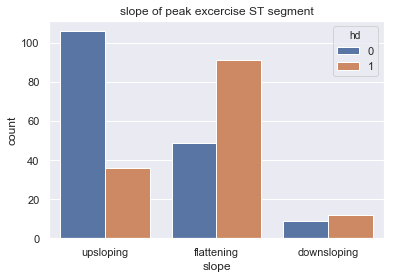

In [34]:
grid = sns.countplot(x='slope', hue='hd', data=data)
grid.set_xticklabels(['upsloping', 'flattening', 'downsloping'])
grid.set_title('slope of peak excercise ST segment')

the 'thal' and 'ca' column some undefined values which are filled as '?'. lets remove them first.

In [144]:
data = data.drop(data[data['thal'] == '?'].index)

In [145]:
data = data.drop(data[data['ca'] == '?'].index)

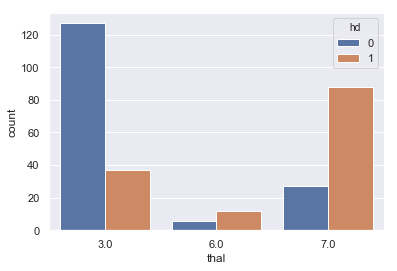

In [60]:
sns.countplot(x='thal', hue='hd', data=data)

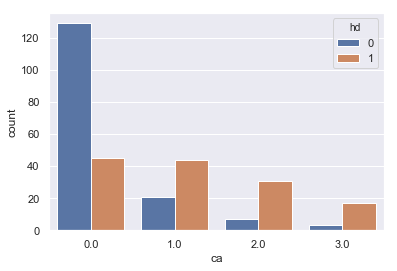

In [61]:
sns.countplot(x='ca', hue='hd', data=data)

people who have less vessels have more chance of having heard disorder.

###### preprocessing of the data

first convert the columns with categorical values to categorical types.

In [146]:
data.dtypes

age             float64
sex             float64
pain            float64
restbps         float64
chol            float64
fbs             float64
restecg         float64
maxheartrate    float64
exang           float64
oldpeak         float64
slope           float64
ca               object
thal             object
hd                int64
dtype: object

In [147]:
data['sex'] = data['sex'].astype('object')
data['pain'] = data['pain'].astype('object')
data['fbs'] = data['fbs'].astype('object')
data['restecg'] = data['restecg'].astype('object')
data['exang'] = data['exang'].astype('object')
data['thal'] = data['thal'].astype('object')
data['slope'] = data['slope'].astype('object')
data['ca'] = (data['ca'].astype('float64')).astype('int64')

In [148]:
data.dtypes

age             float64
sex              object
pain             object
restbps         float64
chol            float64
fbs              object
restecg          object
maxheartrate    float64
exang            object
oldpeak         float64
slope            object
ca                int64
thal             object
hd                int64
dtype: object

also change to value of the categorical columns

In [149]:
data['sex'] = np.where(data['sex'] == 1.0, 'male', 'female')

data.loc[data['pain'] == 1, 'pain'] = 'typical agina'
data.loc[data['pain'] == 2, 'pain'] = 'atypical agina'
data.loc[data['pain'] == 3, 'pain'] = 'non aginal'
data.loc[data['pain'] == 4, 'pain'] = 'asymtomatic'

data.loc[data['fbs'] == 1, 'fbs'] = 'greater than 120 mg/dl'
data.loc[data['fbs'] == 0, 'fbs'] = 'lower than 120 mg/dl'

data.loc[data['exang'] == 1, 'exang'] = 'yes'
data.loc[data['exang'] == 0, 'exang'] = 'no'

data.loc[data['restecg'] == 0, 'restecg'] = 'normal'
data.loc[data['restecg'] == 1, 'restecg'] = 'st-t wave abnormality'
data.loc[data['restecg'] == 2, 'restecg'] = 'left ventricular hypertrophy'

data.loc[data['slope'] == 1, 'slope'] = 'unsloping'
data.loc[data['slope'] == 2, 'slope'] = 'flat'
data.loc[data['slope'] == 3, 'slope'] = 'downsloping'

data.loc[data['thal'] == 3.0, 'thal'] = 'normal'
data.loc[data['thal'] == 6.0, 'thal'] = 'fixed defect'
data.loc[data['thal'] == 7.0, 'thal'] = 'reversable defect'

In [150]:
data = pd.get_dummies(data, drop_first=True)

normalize the numerical columns to adjust them to same scale.

In [151]:
def feature_normalize(X):
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    return (X - mean) / std

In [152]:
feature_to_norm = ['age', 'restbps', 'chol', 'maxheartrate', 'oldpeak']

data[feature_to_norm] = data[feature_to_norm].apply(lambda x : feature_normalize(x))

In [153]:
data.head()

,age,restbps,chol,maxheartrate,oldpeak,ca,hd,sex_male,pain_atypical agina,pain_non aginal,pain_typical agina,fbs_lower than 120 mg/dl,restecg_normal,restecg_st-t wave abnormality,exang_yes,slope_flat,slope_unsloping,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,3,1,1,0,0,0,1,0,0,1,1,0,0,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,2,1,1,0,0,0,1,0,0,1,1,0,0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,0,1,0,1,0,1,1,0,0,0,0,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,0,0,1,0,0,1,0,0,0,0,1,0,0


###### model evaluation

In [169]:
def evaluate_model(y_true, y_predict):
    
    accuracy_score = metrics.accuracy_score(y_true, y_predict)
    print(f'accuracy score : {accuracy_score}\n')
    
    print('classification report : ')
    print(metrics.classification_report(y_true, y_predict, target_names=['has disorder', 'no disorder']))
    
    print('confusion matrix : ')
    print(metrics.confusion_matrix(y_true, y_predict))
    
    

###### models

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('hd', axis=1), data['hd'], test_size = 0.20, random_state = 30)

LogisticRegression

In [249]:
model = LogisticRegression(fit_intercept=True, C=3.0, class_weight={1:50, 0:50})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)

for feature, cof in zip(list(X_train.columns), model.coef_[0]):
    print(f'{feature.ljust(30)} : {cof}')

accuracy score : 0.8833333333333333

classification report : 
              precision    recall  f1-score   support

has disorder       0.85      0.97      0.90        34
 no disorder       0.95      0.77      0.85        26

 avg / total       0.89      0.88      0.88        60

confusion matrix : 
[[33  1]
 [ 6 20]]
age                            : -0.020723475580296163
restbps                        : 0.4273077341118303
chol                           : 0.18787882565510575
maxheartrate                   : -0.40698388130499696
oldpeak                        : 0.4627249723588865
ca                             : 1.340727945522885
sex_male                       : 1.666076228552938
pain_atypical agina            : -0.44406204192714194
pain_non aginal                : -1.743211491960581
pain_typical agina             : -1.8841704023544408
fbs_lower than 120 mg/dl       : 0.5079118405145855
restecg_normal                 : -0.29707878529231435
restecg_st-t wave abnormality  : 0.419668280332

LogisticRegressionCV - this is same implementation as LogisticRegression, but instead of predicting with a single C value, here we can provide an array of C values for which the model is evaluated with each C value

In [250]:
model = LogisticRegressionCV(Cs=[0.001, 0.01, 0.03, 1, 3, 10])
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)
print(f'\n optimal C value : {model.C_[0]} \n')

for feature, cof in zip(list(X_train.columns), model.coef_[0]):
    print(f'{feature.ljust(30)} : {cof}')

accuracy score : 0.8666666666666667

classification report : 
              precision    recall  f1-score   support

has disorder       0.82      0.97      0.89        34
 no disorder       0.95      0.73      0.83        26

 avg / total       0.88      0.87      0.86        60

confusion matrix : 
[[33  1]
 [ 7 19]]

 optimal C value : 1.0 

age                            : -0.014770888253766745
restbps                        : 0.34833730407732116
chol                           : 0.1468564275092248
maxheartrate                   : -0.410336137978407
oldpeak                        : 0.4170068687319984
ca                             : 1.1511536360139971
sex_male                       : 1.1628491246153363
pain_atypical agina            : -0.2576954292353346
pain_non aginal                : -1.1920367870907314
pain_typical agina             : -1.0726423260038276
fbs_lower than 120 mg/dl       : 0.4383465597266348
restecg_normal                 : -0.2801674433592878
restecg_st-t wave abno

RidgeClassifier - implements regularized logistic regression with alpha as regularization parameter

In [252]:
model = RidgeClassifierCV(alphas=(0.01, 0.03, 1, 3, 10, 30))
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)

print(f'\n optimal C value : {model.alpha_} \n')

for feature, cof in zip(list(X_train.columns), model.coef_[0]):
    print(f'{feature.ljust(30)} : {cof}')

accuracy score : 0.8833333333333333

classification report : 
              precision    recall  f1-score   support

has disorder       0.85      0.97      0.90        34
 no disorder       0.95      0.77      0.85        26

 avg / total       0.89      0.88      0.88        60

confusion matrix : 
[[33  1]
 [ 6 20]]

 optimal C value : 10.0 

age                            : 0.009883967022089157
restbps                        : 0.08872795406788747
chol                           : 0.008917499630917258
maxheartrate                   : -0.1167580482881172
oldpeak                        : 0.1072916533145542
ca                             : 0.28820563338935073
sex_male                       : 0.2702475181133788
pain_atypical agina            : -0.12673646855167398
pain_non aginal                : -0.3105296900946006
pain_typical agina             : -0.23744090564462011
fbs_lower than 120 mg/dl       : 0.13004763410459388
restecg_normal                 : -0.08304758974637175
restecg_st-t w

Gaussian Naive Bayes

In [253]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)

accuracy score : 0.8666666666666667

classification report : 
              precision    recall  f1-score   support

has disorder       0.86      0.91      0.89        34
 no disorder       0.88      0.81      0.84        26

 avg / total       0.87      0.87      0.87        60

confusion matrix : 
[[31  3]
 [ 5 21]]


Support Vector machine

In [254]:
model = SVC(C=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)

accuracy score : 0.85

classification report : 
              precision    recall  f1-score   support

has disorder       0.80      0.97      0.88        34
 no disorder       0.95      0.69      0.80        26

 avg / total       0.87      0.85      0.85        60

confusion matrix : 
[[33  1]
 [ 8 18]]


In [255]:
model = SVC(C=1, kernel='linear')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)

for feature, cof in zip(list(X_train.columns), model.coef_[0]):
    print(f'{feature.ljust(30)} : {cof}')

accuracy score : 0.8666666666666667

classification report : 
              precision    recall  f1-score   support

has disorder       0.82      0.97      0.89        34
 no disorder       0.95      0.73      0.83        26

 avg / total       0.88      0.87      0.86        60

confusion matrix : 
[[33  1]
 [ 7 19]]
age                            : -0.0487912536654147
restbps                        : 0.3528140426984412
chol                           : 0.011381915531092246
maxheartrate                   : -0.34681189495389264
oldpeak                        : 0.3634684523599157
ca                             : 0.8819901974307174
sex_male                       : 0.8597452323470463
pain_atypical agina            : -0.10638006821404447
pain_non aginal                : -0.8050351755044343
pain_typical agina             : -1.1438986246062561
fbs_lower than 120 mg/dl       : 0.6918382196262871
restecg_normal                 : 0.022287082753853937
restecg_st-t wave abnormality  : 0.0
exang_ye

DecisionTreeClassifier

In [256]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)

accuracy score : 0.7666666666666667

classification report : 
              precision    recall  f1-score   support

has disorder       0.78      0.82      0.80        34
 no disorder       0.75      0.69      0.72        26

 avg / total       0.77      0.77      0.77        60

confusion matrix : 
[[28  6]
 [ 8 18]]


RandomForestClassifier

In [269]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
evaluate_model(y_test, y_predict)

accuracy score : 0.8333333333333334

classification report : 
              precision    recall  f1-score   support

has disorder       0.80      0.94      0.86        34
 no disorder       0.90      0.69      0.78        26

 avg / total       0.84      0.83      0.83        60

confusion matrix : 
[[32  2]
 [ 8 18]]
